In [1]:
# For this lab, we will be using the same dataset we used in the previous labs. 
# We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

import numpy as np
import pandas as pd

numerical=pd.read_csv("numerical.csv",index_col=0)
categorical=pd.read_csv("categorical.csv",index_col=0)

data=pd.concat([categorical,numerical], axis=1)
data

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,...,effective_year,effective_month,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,...,2011,February,2763.519279,56274,69,32,5,0,1,384.811147
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,...,2011,January,6979.535903,0,94,13,42,0,8,1131.464935
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,...,2011,February,12887.431650,48767,108,18,38,0,2,566.472247
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,...,2011,January,7645.861827,0,106,18,65,0,7,529.881344
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,...,2011,February,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal L1,Offer2,...,2011,February,23405.987980,71941,73,18,89,0,2,198.234764
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Offer1,...,2011,February,3096.511217,21604,79,14,28,0,1,379.200000
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Offer1,...,2011,February,8163.890428,0,85,9,37,3,2,790.784983
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,Offer3,...,2011,February,7524.442436,21941,96,34,3,0,3,691.200000


In [2]:
(data.isna().sum()/len(data)).sort_values(ascending=False)

state                            0.0
vehicle_size                     0.0
number_of_policies               0.0
number_of_open_complaints        0.0
months_since_policy_inception    0.0
months_since_last_claim          0.0
monthly_premium_auto             0.0
income                           0.0
customer_lifetime_value          0.0
effective_month                  0.0
effective_year                   0.0
vehicle_class                    0.0
response                         0.0
sales_channel                    0.0
renew_offer_type                 0.0
policy                           0.0
marital_status                   0.0
location_code                    0.0
gender                           0.0
employmentstatus                 0.0
education                        0.0
coverage                         0.0
total_claim_amount               0.0
dtype: float64

In [3]:
data.dtypes

state                             object
response                          object
coverage                          object
education                         object
employmentstatus                  object
gender                            object
location_code                     object
marital_status                    object
policy                            object
renew_offer_type                  object
sales_channel                     object
vehicle_class                     object
vehicle_size                      object
effective_year                     int64
effective_month                   object
customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [4]:
data['effective_year'] = data['effective_year'].astype(str)

In [5]:
#1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. 
#Use the one you feel more comfortable with, define a function for that. 
#Use the function to remove the outliers and apply it to the dataframe.
numerical = data.select_dtypes(include=['int',"float"])
categorical = data.select_dtypes(include=["object"])

numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


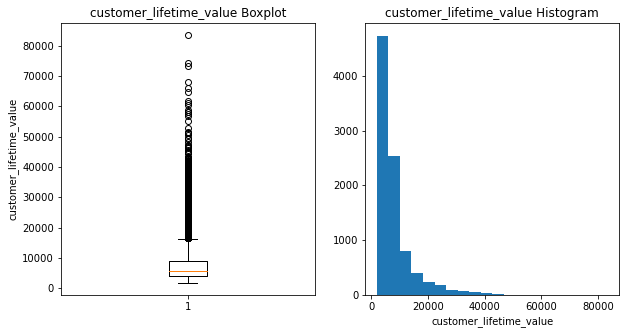

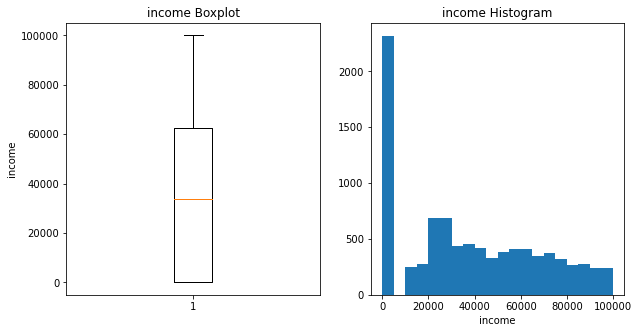

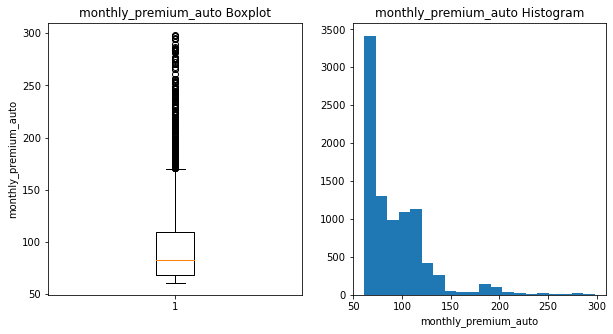

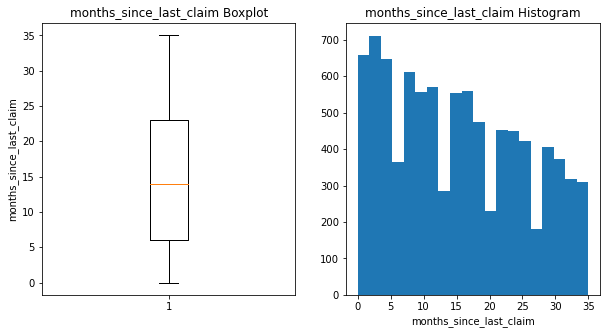

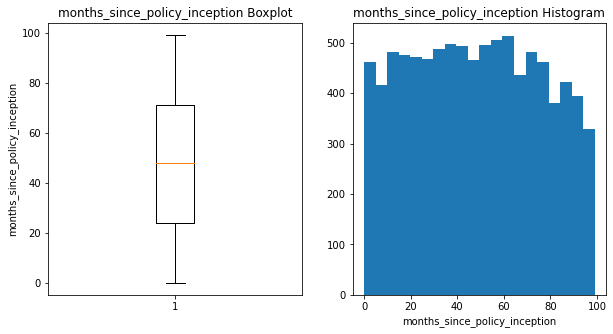

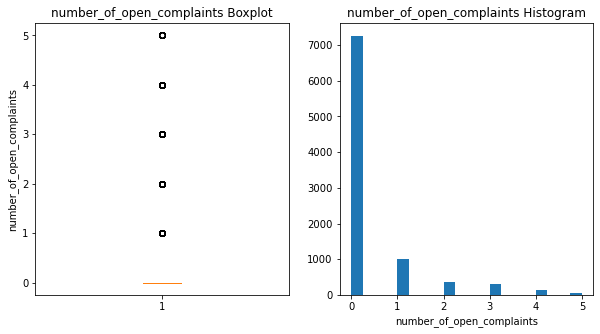

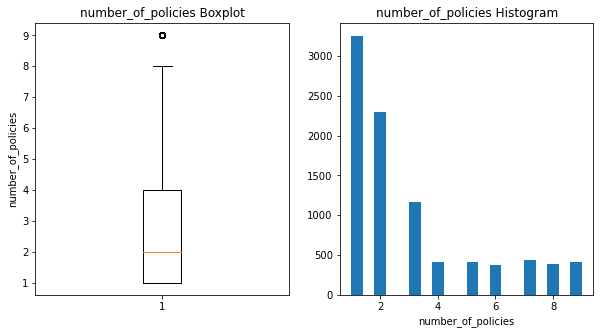

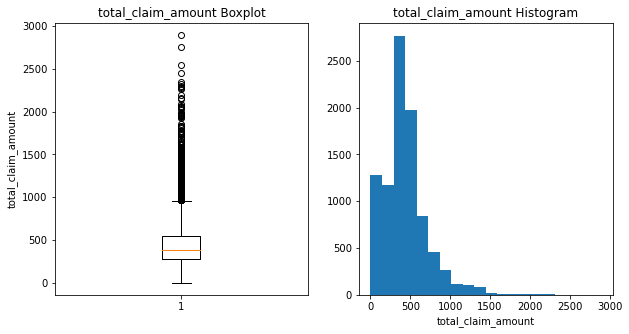

In [6]:
import matplotlib.pyplot as plt

for col in numerical.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    ax1.boxplot(numerical[col])
    ax1.set_title(col + " Boxplot")
    
    ax2.hist(numerical[col], bins=20)
    ax2.set_title(col + " Histogram")
    
    ax1.set_ylabel(col)
    ax2.set_xlabel(col)
    
    plt.show()

From the charts above, it is clear that we should eliminate the upper outliers from the columns "customer_lifetime_value", "monthly_premium_auto" and "total_claim_amount".

In [7]:
cols_outliers=["customer_lifetime_value","monthly_premium_auto"]
cols_outliers

['customer_lifetime_value', 'monthly_premium_auto']

In [8]:
def remove_out(data,cols_outliers):
    for col in cols_outliers:
        iqr = np.percentile(data[col],75)-np.percentile(data[col],25)
        upper_limit = np.percentile(data[col],75) + 1.5*iqr
        data=data[data[col]<upper_limit]
    return data

In [9]:
data=remove_out(data,cols_outliers).reset_index()

In [10]:
data

,index,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,...,effective_year,effective_month,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,...,2011,February,2763.519279,56274,69,32,5,0,1,384.811147
1,1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,...,2011,January,6979.535903,0,94,13,42,0,8,1131.464935
2,2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,...,2011,February,12887.431650,48767,108,18,38,0,2,566.472247
3,3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,...,2011,January,7645.861827,0,106,18,65,0,7,529.881344
4,4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,...,2011,February,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,9128,California,No,Premium,College,Employed,F,Suburban,Single,Personal L2,...,2011,January,4100.398533,47761,104,16,58,0,1,541.282007
8012,9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,...,2011,February,3096.511217,21604,79,14,28,0,1,379.200000
8013,9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,...,2011,February,8163.890428,0,85,9,37,3,2,790.784983
8014,9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,...,2011,February,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
Y=data["total_claim_amount"]
data=data.drop(["total_claim_amount"],axis=1)

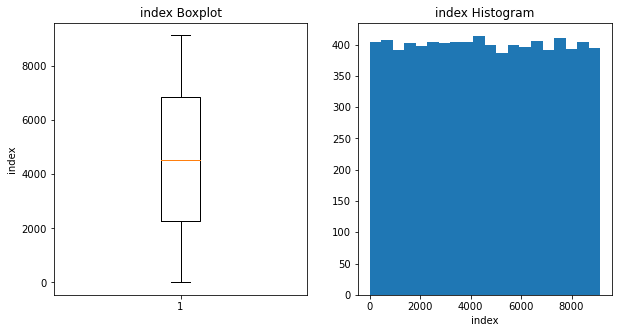

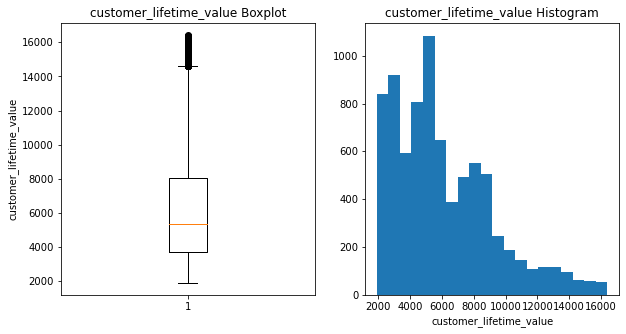

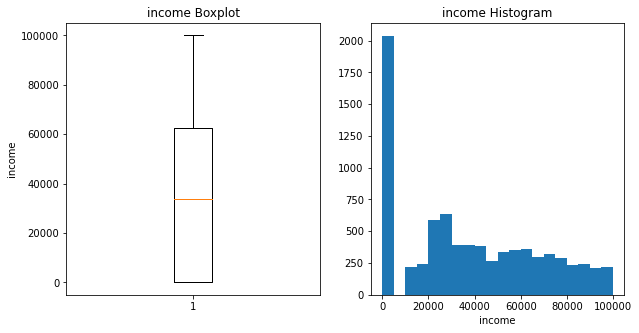

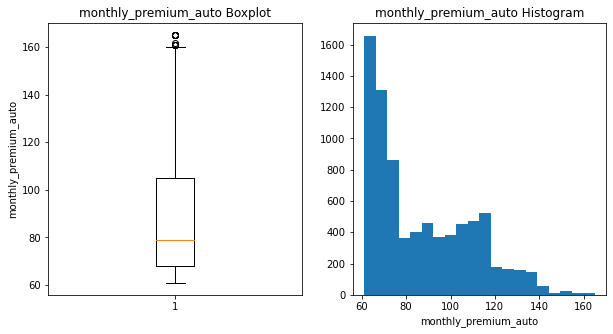

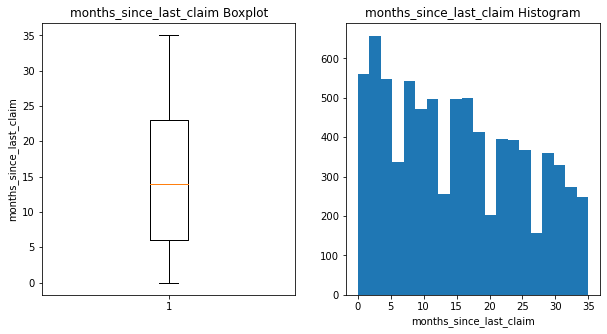

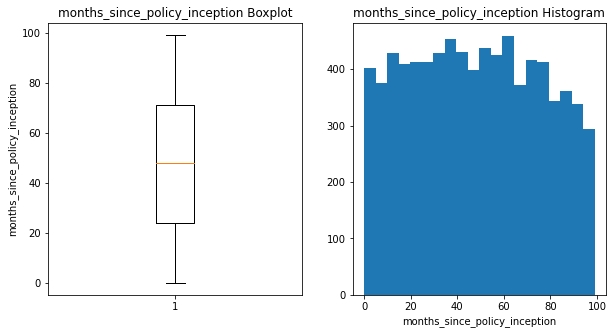

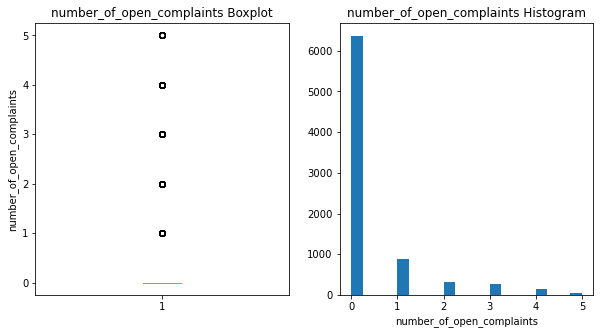

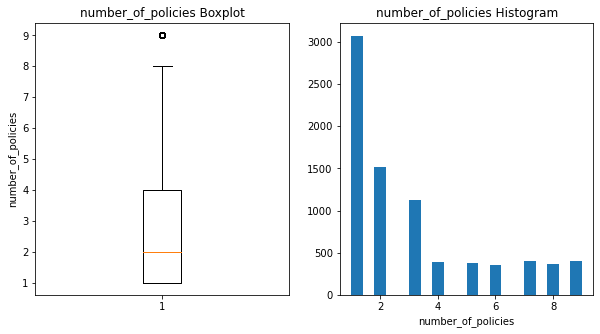

In [12]:
numerical = data.select_dtypes(include=['int',"float"])
categorical = data.select_dtypes(include=["object"])

for col in numerical.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    ax1.boxplot(numerical[col])
    ax1.set_title(col + " Boxplot")
    
    ax2.hist(numerical[col], bins=20)
    ax2.set_title(col + " Histogram")
    
    ax1.set_ylabel(col)
    ax2.set_xlabel(col)
    
    plt.show()

In [13]:
#2. Create a copy of the dataframe for the data wrangling.

data_wrangling=data.copy()
data_wrangling

,index,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,...,vehicle_size,effective_year,effective_month,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,...,Medsize,2011,February,2763.519279,56274,69,32,5,0,1
1,1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,...,Medsize,2011,January,6979.535903,0,94,13,42,0,8
2,2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,...,Medsize,2011,February,12887.431650,48767,108,18,38,0,2
3,3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,...,Medsize,2011,January,7645.861827,0,106,18,65,0,7
4,4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,...,Medsize,2011,February,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,9128,California,No,Premium,College,Employed,F,Suburban,Single,Personal L2,...,Large,2011,January,4100.398533,47761,104,16,58,0,1
8012,9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,...,Medsize,2011,February,3096.511217,21604,79,14,28,0,1
8013,9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,...,Medsize,2011,February,8163.890428,0,85,9,37,3,2
8014,9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,...,Large,2011,February,7524.442436,21941,96,34,3,0,3


In [14]:
#3. Normalize the continuous variables. You can use any one method you want.
discrete_cols=[]
continuous_cols=[]

for col in numerical.columns:
    if numerical[col].nunique() <= 20:
        discrete_cols.append(col)
    else:
        continuous_cols.append(col)
continuous_num = numerical[continuous_cols].reset_index()
continuous_num

,level_0,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,0,0,2763.519279,56274,69,32,5
1,1,1,6979.535903,0,94,13,42
2,2,2,12887.431650,48767,108,18,38
3,3,3,7645.861827,0,106,18,65
4,4,4,2813.692575,43836,73,12,44
...,...,...,...,...,...,...,...
8011,8011,9128,4100.398533,47761,104,16,58
8012,8012,9130,3096.511217,21604,79,14,28
8013,8013,9131,8163.890428,0,85,9,37
8014,8014,9132,7524.442436,21941,96,34,3


In [15]:
discrete_num=numerical[discrete_cols].reset_index()
discrete_num

,index,number_of_open_complaints,number_of_policies
0,0,0,1
1,1,0,8
2,2,0,2
3,3,0,7
4,4,0,1
...,...,...,...
8011,8011,0,1
8012,8012,0,1
8013,8013,3,2
8014,8014,0,3


In [16]:
#apply MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

transformer=MinMaxScaler().fit(continuous_num)
continuous_num_norm=transformer.transform(continuous_num)

continuous_num_norm=pd.DataFrame(continuous_num_norm)
continuous_num_norm.columns=continuous_num.columns
continuous_num_norm

,level_0,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception
0,0.000000,0.000000,0.059651,0.562847,0.076923,0.914286,0.050505
1,0.000125,0.000109,0.350217,0.000000,0.317308,0.371429,0.424242
2,0.000250,0.000219,0.757387,0.487763,0.451923,0.514286,0.383838
3,0.000374,0.000328,0.396140,0.000000,0.432692,0.514286,0.656566
4,0.000499,0.000438,0.063109,0.438443,0.115385,0.342857,0.444444
...,...,...,...,...,...,...,...
8011,0.999501,0.999453,0.151788,0.477701,0.413462,0.457143,0.585859
8012,0.999626,0.999672,0.082600,0.216081,0.173077,0.400000,0.282828
8013,0.999750,0.999781,0.431842,0.000000,0.230769,0.257143,0.373737
8014,0.999875,0.999891,0.387772,0.219452,0.336538,0.971429,0.030303


In [17]:
numerical=pd.concat([continuous_num_norm,discrete_num], axis=1)
numerical

,level_0,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,index,number_of_open_complaints,number_of_policies
0,0.000000,0.000000,0.059651,0.562847,0.076923,0.914286,0.050505,0,0,1
1,0.000125,0.000109,0.350217,0.000000,0.317308,0.371429,0.424242,1,0,8
2,0.000250,0.000219,0.757387,0.487763,0.451923,0.514286,0.383838,2,0,2
3,0.000374,0.000328,0.396140,0.000000,0.432692,0.514286,0.656566,3,0,7
4,0.000499,0.000438,0.063109,0.438443,0.115385,0.342857,0.444444,4,0,1
...,...,...,...,...,...,...,...,...,...,...
8011,0.999501,0.999453,0.151788,0.477701,0.413462,0.457143,0.585859,8011,0,1
8012,0.999626,0.999672,0.082600,0.216081,0.173077,0.400000,0.282828,8012,0,1
8013,0.999750,0.999781,0.431842,0.000000,0.230769,0.257143,0.373737,8013,3,2
8014,0.999875,0.999891,0.387772,0.219452,0.336538,0.971429,0.030303,8014,0,3


In [18]:
#4. Encode the categorical variables
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_year,effective_month
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2011,February
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize,2011,January
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2011,February
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize,2011,January
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2011,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,California,No,Premium,College,Employed,F,Suburban,Single,Personal L2,Offer1,Branch,Four-Door Car,Large,2011,January
8012,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,2011,February
8013,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,2011,February
8014,California,No,Extended,College,Employed,M,Suburban,Married,Personal L2,Offer3,Branch,Four-Door Car,Large,2011,February


In [19]:
#5 The time variable can be useful. 
# Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

Time already splited into categorical months and years!

In [20]:
for col in categorical.columns:
    print(f"Unique values in column '{col}':")
    print(categorical[col].nunique())

Unique values in column 'state':
5
Unique values in column 'response':
2
Unique values in column 'coverage':
3
Unique values in column 'education':
5
Unique values in column 'employmentstatus':
5
Unique values in column 'gender':
2
Unique values in column 'location_code':
3
Unique values in column 'marital_status':
3
Unique values in column 'policy':
9
Unique values in column 'renew_offer_type':
4
Unique values in column 'sales_channel':
4
Unique values in column 'vehicle_class':
4
Unique values in column 'vehicle_size':
3
Unique values in column 'effective_year':
1
Unique values in column 'effective_month':
2


Acceptable unique values!


#### One Hot Encoder

In [21]:
from sklearn.preprocessing import OneHotEncoder

one_hot_names = []
for col in categorical.columns:
    col_uniques = sorted(categorical[col].astype(str).unique())
    for unique in col_uniques:
        one_hot_names.append(col+"_"+unique)

categorical = pd.DataFrame(OneHotEncoder().fit_transform(categorical.astype(str)).toarray())
categorical.columns = one_hot_names
categorical

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small,effective_year_2011,effective_month_February,effective_month_January
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8012,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8013,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
8014,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [22]:
#6. Since the model will only accept numerical data, check and make sure that every column is numerical, 
# if some are not, change it using encoding.

X=pd.concat([categorical,numerical], axis=1)
X

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,...,level_0,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,index,number_of_open_complaints,number_of_policies
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.059651,0.562847,0.076923,0.914286,0.050505,0,0,1
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.000125,0.000109,0.350217,0.000000,0.317308,0.371429,0.424242,1,0,8
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.000250,0.000219,0.757387,0.487763,0.451923,0.514286,0.383838,2,0,2
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.000374,0.000328,0.396140,0.000000,0.432692,0.514286,0.656566,3,0,7
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.000499,0.000438,0.063109,0.438443,0.115385,0.342857,0.444444,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.999501,0.999453,0.151788,0.477701,0.413462,0.457143,0.585859,8011,0,1
8012,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.999626,0.999672,0.082600,0.216081,0.173077,0.400000,0.282828,8012,0,1
8013,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.999750,0.999781,0.431842,0.000000,0.230769,0.257143,0.373737,8013,3,2
8014,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.999875,0.999891,0.387772,0.219452,0.336538,0.971429,0.030303,8014,0,3


In [23]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=90)
model = sm.OLS(y_train,x_train).fit()
predictions = model.predict(x_test)
r2 = r2_score(y_test,predictions)
print("r2 score is: ", r2)

r2 score is:  0.7530348020600506


In [24]:
#comparison between real Y and predictions
comparison=pd.concat([y_test,predictions],axis=1)
comparison.columns=["y_test","predictions"]
comparison=comparison.reset_index()
comparison=comparison.drop(["index"],axis=1)
display(pd.DataFrame(comparison))

,y_test,predictions
0,254.311154,180.298924
1,321.600000,379.811357
2,585.482275,520.383223
3,547.200000,598.745345
4,456.702735,333.483039
...,...,...
2400,552.000000,654.505289
2401,1176.278800,521.756173
2402,346.265295,451.352453
2403,459.048775,359.251416
